In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.labelcolor" : "w",
#           "axes.edgecolor" : "w"}
# plt.rcParams.update(params)

import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd

from tensorflow.core.util import event_pb2

from DataModel import DataModel
from Evaluation import Evaluation
from SERModel import SERModel



logFolder = os.path.join(os.getcwd(), 'IEMOCAP_ModelLog')
resultFolder = os.path.join(os.getcwd(), 'IEMOCAP_TrainedModel')

# plt.savefig("figure.png", transparent=True, bbox_inches='tight')


## Baseline Model

Loading and Extracting IEMOCAP Data...
    Loaded and Extracted  7380 data

Data Extration Completed
    Number of data: 7380
      Neutral     : 1708
      Frustration : 1849
      Anger       : 1103
      Sadness     : 1084
      Happiness   : 1636
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 5904
    Testing Size  : 1476

Split or Add Padding for training data:
    Split Duration  : 8
    Ignore Duration : 6
Processing...
    Processed  6000 data split and padding
Data Splitting and Padding For Training Completed!

Processing training data to Mel Spectrogram...
    Processed  6000 Mel Spectrogram
Mel Spectrogram Processing For Training Completed
    Shape of training images: (6000, 256, 256, 1)

Processing training labels...
Label Processing For Training Completed

Split or Add Padding for testing data
    Split Duration  : 8
    Ignore Duration : 6
Proc

2023-01-15 17:33:52.192785: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Start prediction...

Prediction Completed
    Number of results: 1501


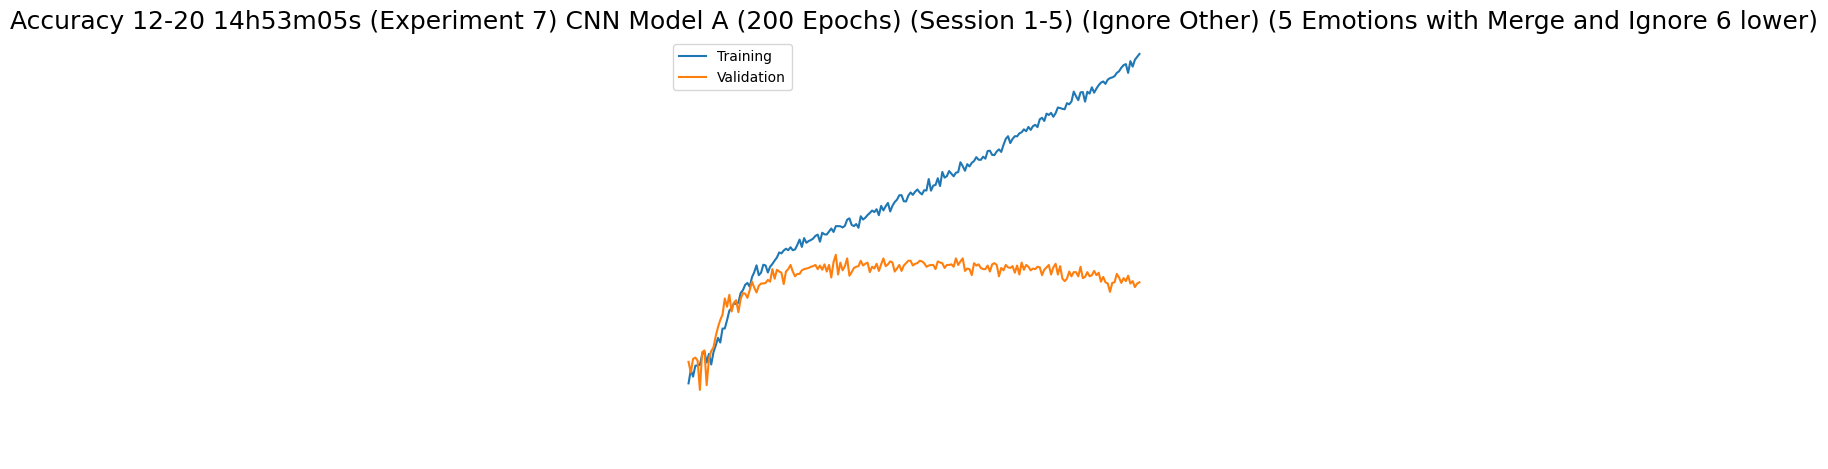

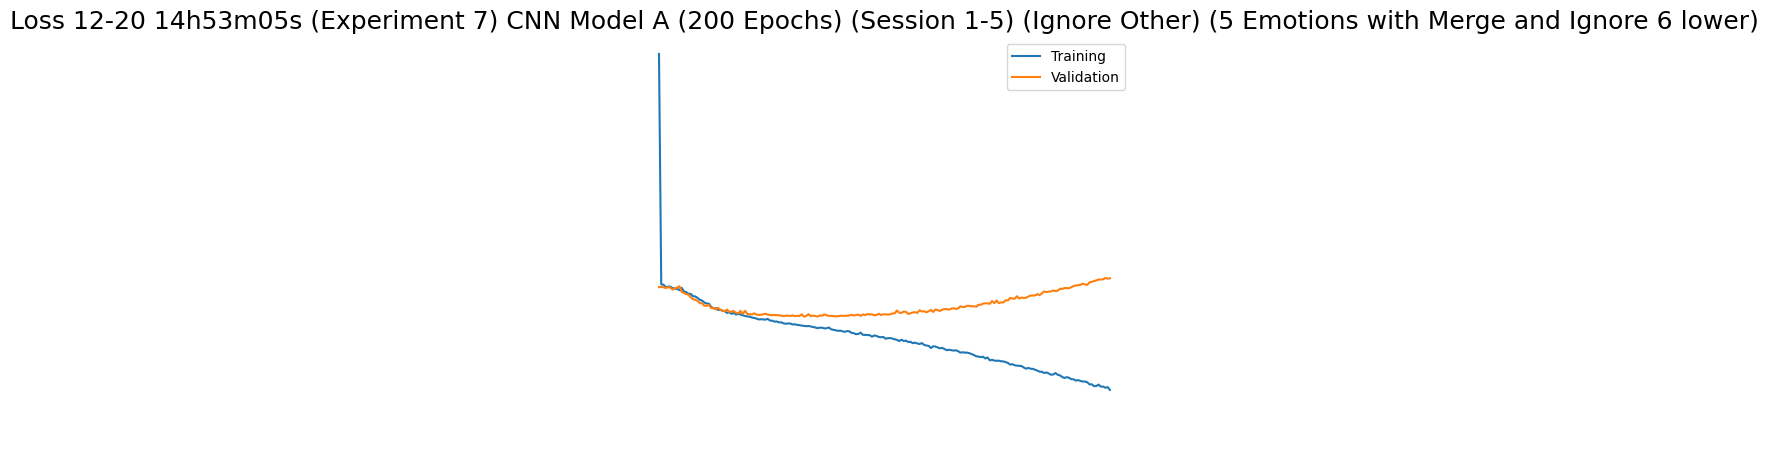

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.00      0.00      0.00       360
           2       0.00      0.00      0.00       337
           3       0.00      0.00      0.00       336
           4       0.17      1.00      0.30       260

    accuracy                           0.17      1501
   macro avg       0.03      0.20      0.06      1501
weighted avg       0.03      0.17      0.05      1501



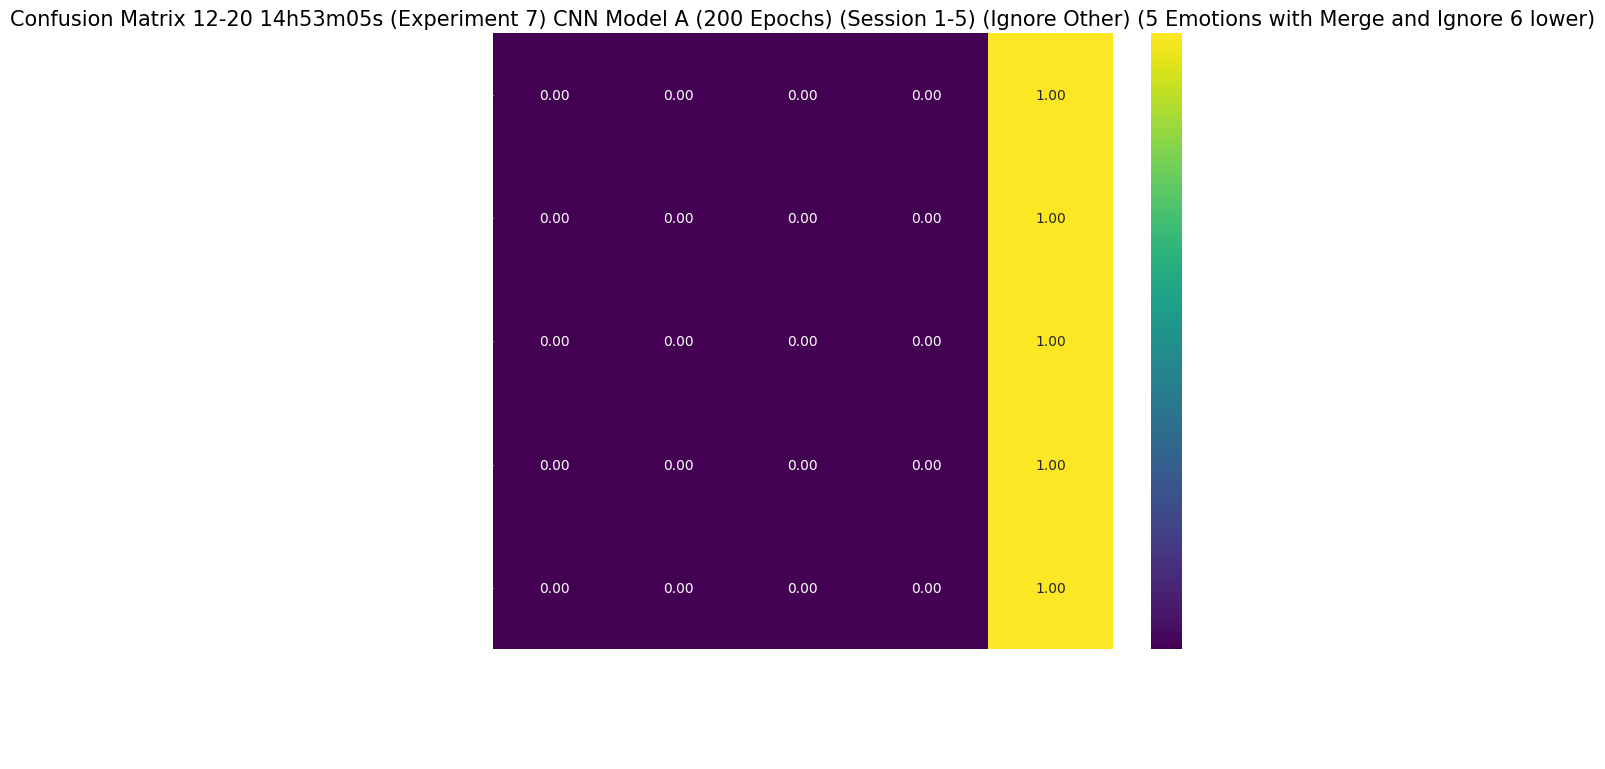

In [19]:
labelsToInclude = ['Anger', 'Frustration', 'Happiness', 'Neutral',  'Sadness']
mergeHappinessExcitement = True
ignoreDuration = 6

iemocap5LabelsIgnore6 = DataModel(labelsToInclude=labelsToInclude,
                                  mergeHappinessExcitement=mergeHappinessExcitement,
                                  ignoreDuration=ignoreDuration)
iemocap5LabelsIgnore6.extractIEMOCAPData()
iemocap5LabelsIgnore6.processData()

def experiment7(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-20 14h53m05s (Experiment 7) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Ignore 6 lower)'
trainName = 'events.out.tfevents.1671519188.gpu-comp-104.27293.2.v2'
validName = 'events.out.tfevents.1671519192.gpu-comp-104.27293.3.v2'
experiment7(iemocap5LabelsIgnore6, experimentName, trainName, validName)

## Final Model

In [2]:
labelsToInclude = ['Anger', 'Frustration', 'Happiness', 'Neutral',  'Sadness']
mergeHappinessExcitement = True
splitDuration = 8
ignoreDuration = 2
transformByStft=True
hop_length = 512
win_length = 2048
n_mels = 128
onehot = False
timeShape = True

dataModel = DataModel(labelsToInclude=labelsToInclude,
                                                mergeHappinessExcitement=mergeHappinessExcitement,
                                                splitDuration=splitDuration,
                                                ignoreDuration=ignoreDuration,
                                                transformByStft=transformByStft,
                                                hop_length=hop_length,
                                                win_length=win_length,
                                                n_mels=n_mels,
                                                onehot=onehot,
                                                timeShape=timeShape)
dataModel.extractEmoDBData()
dataModel.processTestingDataOnly()

Loading and Extracting EmoDB Data...
    Loaded and Extracted   408 data

Data Extration Completed
    Number of data: 408
      Neutral     : 79
      Frustration : 69
      Anger       : 127
      Sadness     : 62
      Happiness   : 71
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 327
    Testing Size  : 81

Split or Add Padding for testing data
    Split Duration  : 8
    Ignore Duration : 2
Processing...
    Processed    81 data split and padding
Data Splitting and Padding For Testing Completed!

Processing testing data to Mel Spectrogram...
    Processed    81 Mel Spectrogram
Mel Spectrogram Processing For Testing Completed
    Shape of testing images: (81, 251, 128, 1)

Processing testing labels...
Label Processing For Testing Completed

Data Processing Completed!
  Data shapes:
    x_test   : (81, 251, 128, 1)
    y_test   : (81,)
    sr_test  : (81,

In [3]:
model =  SERModel("bestCNNModelLstmC", "Mame", input_shape=dataModel.x_test[0].shape)

2023-01-16 21:36:18.526112: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



########################################################
################### Training Section ###################
########################################################

Model Information:
    Model Choice     : bestCNNModelLstmC
    Experiment Name  : 01-16 21h36m18s Mame
    Log Directory    : /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_ModelLog/01-16 21h36m18s Mame
    Result Directory : /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/01-16 21h36m18s Mame
    Optimizer        : adam
      Learning Rate  : 0.0001
      Decay          : 0.001
    Loss             : Sparse Categorical Crossentropy
    Metrics          : Accuracy



In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 63, 120)      1200      
                                                                 
 batch_normalization (BatchN  (None, 125, 63, 120)     480       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 31, 120)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 29, 256)       276736    
                                                                 
 batch_normalization_1 (Batc  (None, 60, 29, 256)      1024      
 hNormalization)                                                 
                                                        

## Baseline vs CNN vs CNNLSTM

In [3]:
def showAccuracyAndLoss(logDir, trainName, validName):
  logDir = os.path.join("IEMOCAP_ModelLog", logDir)
  
  event_training = os.path.join(logDir, 'train', trainName)
  event_validation = os.path.join(logDir, 'validation', validName)

  training_accuracy = []
  training_loss = []
  validation_accuracy = []
  validation_loss = []
  epoch = []

  serialized_examples = tf.data.TFRecordDataset(event_training)
  for serialized_example in serialized_examples:
      event = event_pb2.Event.FromString(serialized_example.numpy())
      for value in event.summary.value:
          t = tf.make_ndarray(value.tensor)
          if (value.tag == 'epoch_accuracy'):
            training_accuracy.append(np.float32(t))
            epoch.append(event.step)
          elif (value.tag == 'epoch_loss'):
            training_loss.append(np.float32(t))



  serialized_examples = tf.data.TFRecordDataset(event_validation)
  for serialized_example in serialized_examples:
      event = event_pb2.Event.FromString(serialized_example.numpy())
      for value in event.summary.value:
          t = tf.make_ndarray(value.tensor)
          if (value.tag == 'epoch_accuracy'):
            validation_accuracy.append(np.float32(t))
          elif (value.tag == 'epoch_loss'):
            validation_loss.append(np.float32(t))
            
  return epoch, training_accuracy, validation_accuracy, training_loss, validation_loss

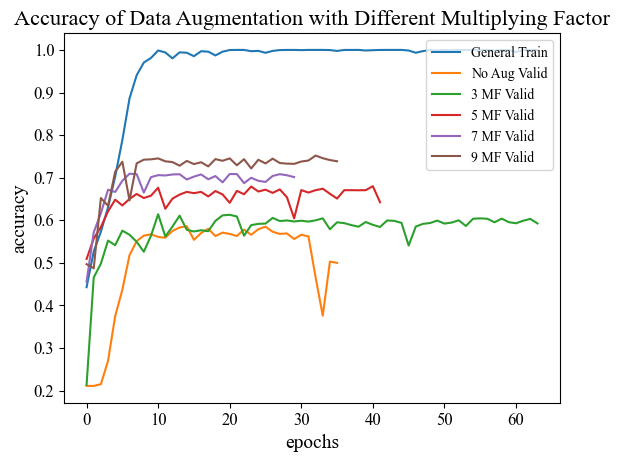

No Aug => Train: 0.9857357144355774, Valid: 0.5
3 MF => Train: 0.9998338222503662, Valid: 0.5925556421279907
5 MF => Train: 0.9992523789405823, Valid: 0.6423444747924805
7 MF => Train: 0.9995731711387634, Valid: 0.7013800144195557
9 MF => Train: 0.9994471669197083, Valid: 0.7385295629501343


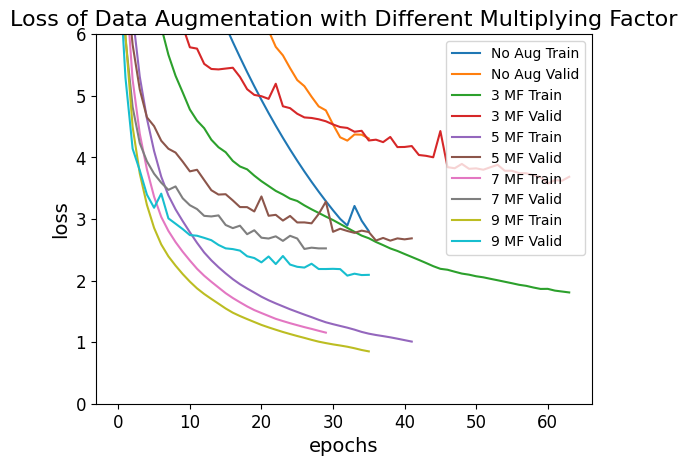

In [14]:
start = 0
accuracyTitle = "Accuracy of Data Augmentation with Different Multiplying Factor"

lossTitle = "Loss of Data Augmentation with Different Multiplying Factor"
titleFontSize = 16
plotList = []

labelName = "No Aug"
logDir = "04-16 17h31m39s FinalModel-4Emotions-0Aug-500Epochs-64BatchSize-1"
trainName = "events.out.tfevents.1681637503.gpu-3090-201.24383.0.v2"
validName = "events.out.tfevents.1681637514.gpu-3090-201.24383.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

labelName = "3 MF"
logDir = "03-29 03h39m45s FinalModel-4Emotions-3Aug-500Epochs-64BatchSize-1"
trainName = "events.out.tfevents.1680032391.gpu-comp-202.9290.0.v2"
validName = "events.out.tfevents.1680032503.gpu-comp-202.9290.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

labelName = "5 MF"
logDir = "04-16 13h40m20s FinalModel-4Emotions-5Aug-500Epochs-64BatchSize-1"
trainName = "events.out.tfevents.1681623631.gpu-3090-201.17057.0.v2"
validName = "events.out.tfevents.1681623663.gpu-3090-201.17057.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

labelName = "7 MF"
logDir = "04-16 16h58m06s FinalModel-4Emotions-7Aug-500Epochs-32BatchSize-1"
trainName = "events.out.tfevents.1681635499.gpu-3090-201.21029.0.v2"
validName = "events.out.tfevents.1681635534.gpu-3090-201.21029.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

labelName = "9 MF"
logDir = "04-16 20h18m52s FinalModel-4Emotions-9Aug-500Epochs-32BatchSize-1"
trainName = "events.out.tfevents.1681647547.gpu-3090-201.26293.0.v2"
validName = "events.out.tfevents.1681647590.gpu-3090-201.26293.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

# labelName = "Best CNN-LSTM"
# logDir = "01-15 02h26m27s (Experiment56) FINAL CNN LSTM (100 Epochs) (IEMOCAP EmoDB) (No Data Aug) (5 Emotions with Merge and Split 8 Ignore 2 STFT) (00005 lr 0005 decay Stop 3)"
# trainName = "events.out.tfevents.1673720793.gpu-comp-203.9516.0.v2"
# validName = "events.out.tfevents.1673720818.gpu-comp-203.9516.1.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)
 
font = {'fontname':'Times New Roman'} 

i = 0
for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  if (i == 1):
    plt.plot(epoch[start:], training_accuracy[start:], label="General Train")
  i += 1

for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  plt.plot(epoch[start:], validation_accuracy[start:], label=labelName+" Valid")

plt.title(accuracyTitle, fontsize=titleFontSize, **font)
plt.xlabel('epochs', fontsize=14, **font)
plt.ylabel('accuracy', fontsize=14, **font)
plt.xticks(rotation=0, fontsize=12, **font)
plt.yticks(rotation=0, fontsize=12, **font)
plt.legend(loc="upper right", prop={'family': font['fontname']})
# plt.show()
plt.savefig("figure.png", transparent=True, bbox_inches='tight')
plt.show()

for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  plt.plot(epoch[start:], training_loss[start:], label=labelName+" Train")
  plt.plot(epoch[start:], validation_loss[start:], label=labelName+" Valid")
  print(f'{labelName} => Train: {training_accuracy[-1]}, Valid: {validation_accuracy[-1]}')

plt.title(lossTitle, fontsize=titleFontSize)
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
ax = plt.gca()
ax.set_ylim([0, 6])
plt.legend()
# plt.savefig("figure.png", transparent=True, bbox_inches='tight')
plt.show()

## Final Model on EmoDB

In [3]:
def showAccuracyAndLoss(logDir, trainName, validName):
  logDir = os.path.join("IEMOCAP_ModelLog", logDir)
  
  event_training = os.path.join(logDir, 'train', trainName)
  event_validation = os.path.join(logDir, 'validation', validName)

  training_accuracy = []
  training_loss = []
  validation_accuracy = []
  validation_loss = []
  epoch = []

  serialized_examples = tf.data.TFRecordDataset(event_training)
  for serialized_example in serialized_examples:
      event = event_pb2.Event.FromString(serialized_example.numpy())
      for value in event.summary.value:
          t = tf.make_ndarray(value.tensor)
          if (value.tag == 'epoch_accuracy'):
            training_accuracy.append(np.float32(t))
            epoch.append(event.step)
          elif (value.tag == 'epoch_loss'):
            training_loss.append(np.float32(t))



  serialized_examples = tf.data.TFRecordDataset(event_validation)
  for serialized_example in serialized_examples:
      event = event_pb2.Event.FromString(serialized_example.numpy())
      for value in event.summary.value:
          t = tf.make_ndarray(value.tensor)
          if (value.tag == 'epoch_accuracy'):
            validation_accuracy.append(np.float32(t))
          elif (value.tag == 'epoch_loss'):
            validation_loss.append(np.float32(t))
            
  return epoch, training_accuracy, validation_accuracy, training_loss, validation_loss

Baseline CNN => Train: 0.5378788113594055, Valid: 0.5303030014038086
Best CNN-LSTM Model => Train: 0.9885203838348389, Valid: 0.8781725764274597


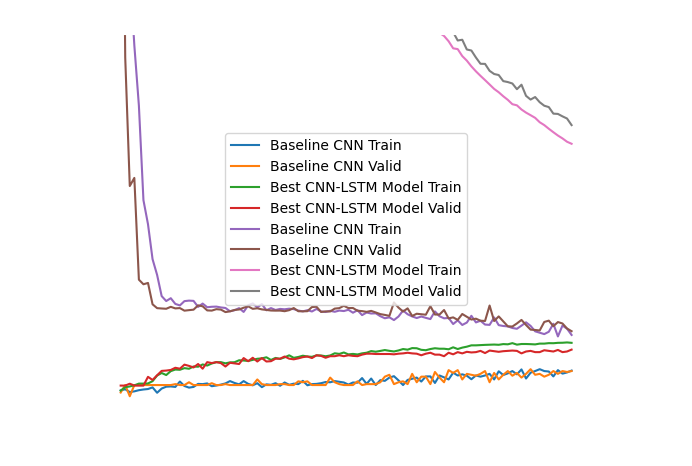

In [6]:
start = 0
accuracyTitle = "Accuracy for Baseline CNN and Final CNN-LSTM model on EmoDB"

lossTitle = "Loss for Baseline CNN, Best CNN, and Best CNN-LSTM Model"
titleFontSize = 16
plotList = []

labelName = "Baseline CNN"
logDir = "01-17 11h42m50s (Experiment 61) Baseline Model (100 Epochs) (EmoDB) (5 Emotions with Merge and Split 4 Ignore 2 STFT) (00005 lr 0005 decay)"
trainName = "events.out.tfevents.1673926972.gpu-comp-201.22498.0.v2"
validName = "events.out.tfevents.1673926978.gpu-comp-201.22498.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

labelName = "Best CNN-LSTM Model"
logDir = "01-17 00h07m08s (Experiment 60) Best CNN Model (100 Epochs) (EmoDB) (Data Aug 3) (5 Emotions with Merge and Split 8 Ignore 2 STFT) (00005 lr 0005 decay Stop 3)"
trainName = "events.out.tfevents.1673885229.gpu-comp-201.7326.4.v2"
validName = "events.out.tfevents.1673885234.gpu-comp-201.7326.5.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)
 
for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  plt.plot(epoch[start:], training_accuracy[start:], label=labelName+" Train")
  plt.plot(epoch[start:], validation_accuracy[start:], label=labelName+" Valid")

plt.title(accuracyTitle, fontsize=titleFontSize, color='w')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.legend(loc="upper left")
# plt.show()
plt.savefig("figure.png", transparent=True, bbox_inches='tight')

for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  plt.plot(epoch[start:], training_loss[start:], label=labelName+" Train")
  plt.plot(epoch[start:], validation_loss[start:], label=labelName+" Valid")
  print(f'{labelName} => Train: {training_accuracy[-1]}, Valid: {validation_accuracy[-1]}')

plt.title(lossTitle, fontsize=titleFontSize)
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
ax = plt.gca()
ax.set_ylim([0, 6])
plt.legend()
plt.show()

## Different Split Size

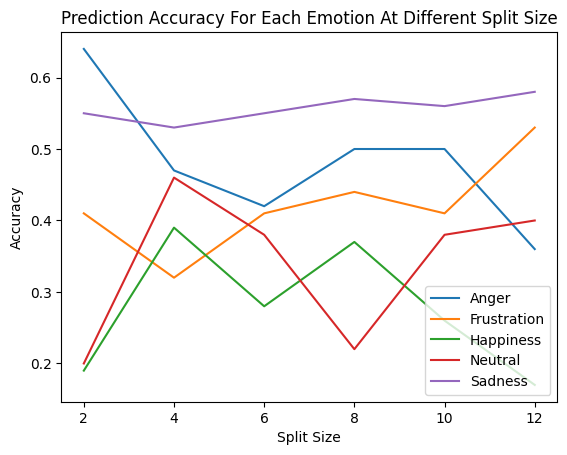

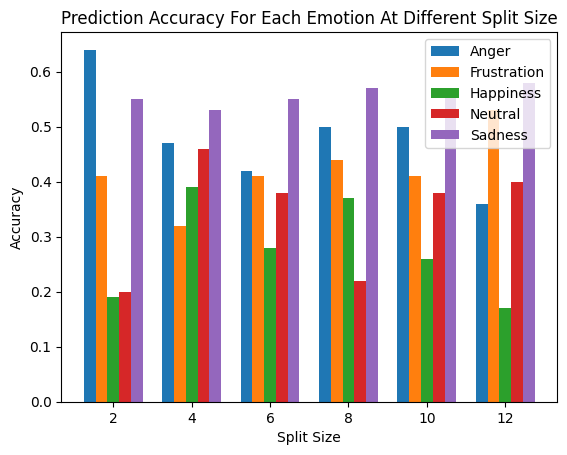

In [2]:
anger = [0.64, 0.47, 0.42, 0.5, 0.5, 0.36]
frustration = [0.41, 0.32, 0.41, 0.44, 0.41, 0.53]
happiness = [0.19, 0.39, 0.28, 0.37, 0.26, 0.17]
neutral = [0.2, 0.46, 0.38, 0.22, 0.38, 0.4]
sadness = [0.55, 0.53, 0.55, 0.57, 0.56, 0.58]
x = [2, 4, 6, 8, 10, 12]
x_axis = np.arange(len(x))

plt.plot(x, anger, label='Anger')
plt.plot(x, frustration, label='Frustration')
plt.plot(x, happiness, label='Happiness')
plt.plot(x, neutral, label='Neutral')
plt.plot(x, sadness, label='Sadness')
plt.title('Prediction Accuracy For Each Emotion At Different Split Size')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.bar(x_axis - 0.3, anger, 0.15, label="Anger")
plt.bar(x_axis - 0.15, frustration, 0.15, label="Frustration")
plt.bar(x_axis, happiness, 0.15, label='Happiness')
plt.bar(x_axis + 0.15, neutral, 0.15, label='Neutral')
plt.bar(x_axis + 0.3, sadness, 0.15, label='Sadness')
plt.xticks(x_axis, x)
plt.title('Prediction Accuracy For Each Emotion At Different Split Size')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Different Hop Length and Window Length

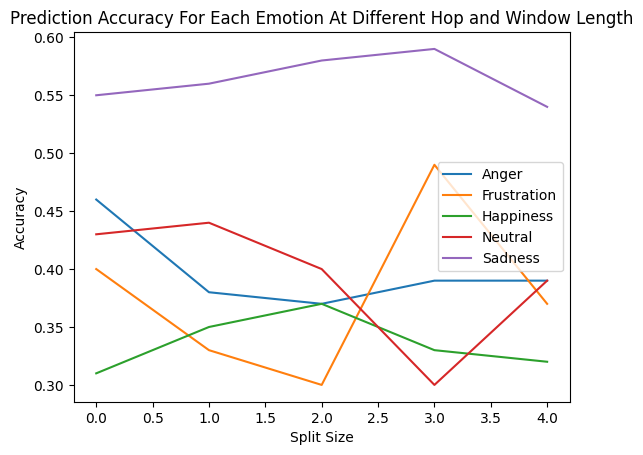

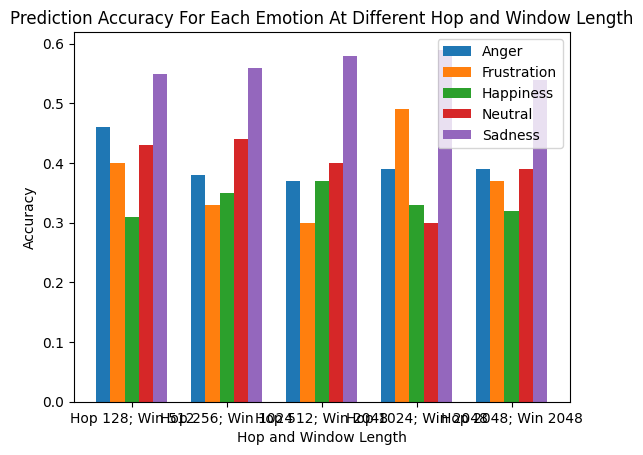

In [10]:
anger = [0.46, 0.38, 0.37, 0.39, 0.39]
frustration = [0.40, 0.33, 0.30, 0.49, 0.37]
happiness = [0.31, 0.35, 0.37, 0.33, 0.32]
neutral = [0.43, 0.44, 0.40, 0.30, 0.39]
sadness = [0.55, 0.56, 0.58, 0.59, 0.54]
x = [0, 1, 2, 3, 4]
hop_length = ["Hop 128; Win 512", "Hop 256; Win 1024", "Hop 512; Win 2048", "Hop 1024; Win 2048", "Hop 2048; Win 2048"]
x_axis = np.arange(len(x))

plt.plot(x, anger, label='Anger')
plt.plot(x, frustration, label='Frustration')
plt.plot(x, happiness, label='Happiness')
plt.plot(x, neutral, label='Neutral')
plt.plot(x, sadness, label='Sadness')
# plt.xticks(x_axis, hop_length)
plt.title('Prediction Accuracy For Each Emotion At Different Hop and Window Length')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.bar(x_axis - 0.3, anger, 0.15, label="Anger")
plt.bar(x_axis - 0.15, frustration, 0.15, label="Frustration")
plt.bar(x_axis, happiness, 0.15, label='Happiness')
plt.bar(x_axis + 0.15, neutral, 0.15, label='Neutral')
plt.bar(x_axis + 0.3, sadness, 0.15, label='Sadness')
plt.xticks(x_axis, hop_length)
plt.title('Prediction Accuracy For Each Emotion At Different Hop and Window Length')
plt.xlabel('Hop and Window Length')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Different First Layer

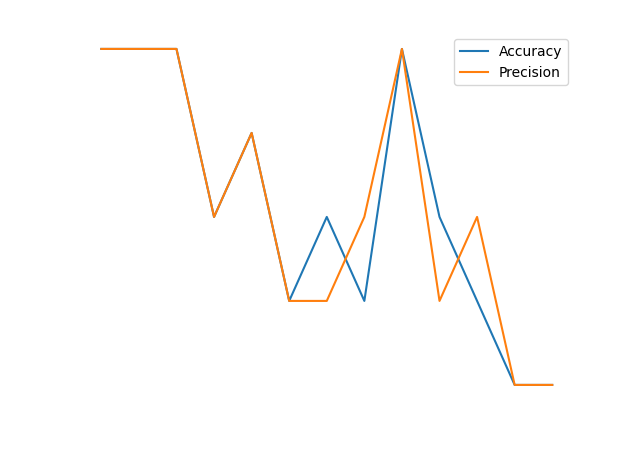

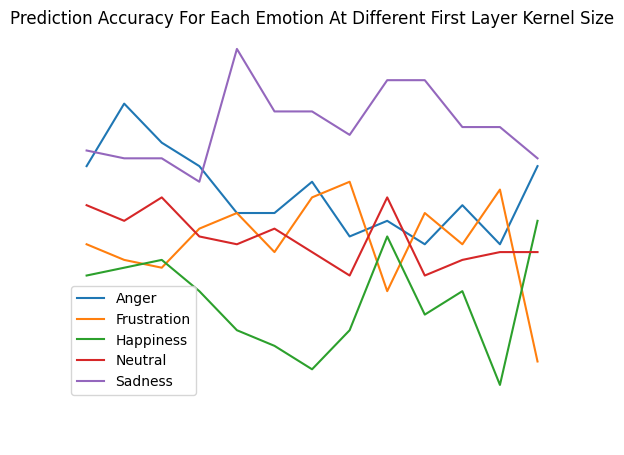

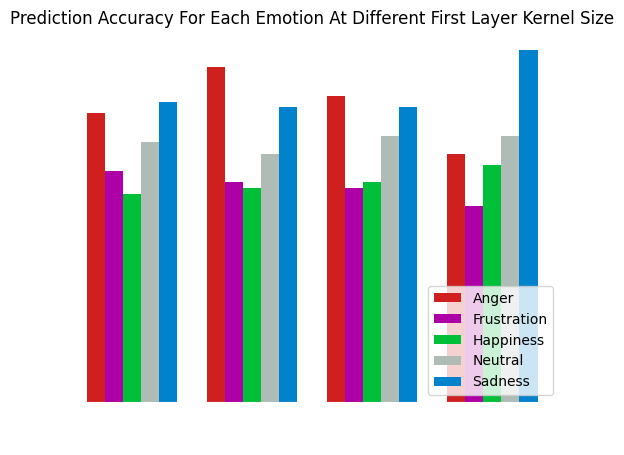

In [22]:
accuracy = [0.44, 0.44, 0.44, 0.42, 0.43, 0.41, 0.42, 0.41, 0.44, 0.42, 0.41, 0.4, 0.4]
precision = [0.44, 0.44, 0.44, 0.42, 0.43, 0.41, 0.41, 0.42, 0.44, 0.41, 0.42, 0.4, 0.4]
x = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
hop_length = ["3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
x_axis = np.arange(len(x))

plt.plot(x, accuracy, label='Accuracy')
plt.plot(x, precision, label='Precision')
# plt.xticks(x_axis, hop_length)
plt.title('Prediction Accuracy For Each Emotion At Different First Layer Kernel Size', color='#ffffff')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig("figure.png", transparent=True, bbox_inches='tight')


anger = [0.5, 0.58, 0.53, 0.5, 0.44, 0.44, 0.48, 0.41, 0.43, 0.40, 0.45, 0.4, 0.5]
frustration = [0.4, 0.38, 0.37, 0.42, 0.44, 0.39, 0.46, 0.48, 0.34, 0.44, 0.4, 0.47, 0.25]
happiness = [0.36, 0.37, 0.38, 0.34, 0.29, 0.27, 0.24, 0.29, 0.41, 0.31, 0.34, 0.22, 0.43]
neutral = [0.45, 0.43, 0.46, 0.41, 0.40, 0.42, 0.39, 0.36, 0.46, 0.36, 0.38, 0.39, 0.39]
sadness = [0.52, 0.51, 0.51, 0.48, 0.65, 0.57, 0.57, 0.54, 0.61, 0.61, 0.55, 0.55, 0.51]
x = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
hop_length = ["3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
x_axis = np.arange(len(x))

plt.plot(x, anger, label='Anger')
plt.plot(x, frustration, label='Frustration')
plt.plot(x, happiness, label='Happiness')
plt.plot(x, neutral, label='Neutral')
plt.plot(x, sadness, label='Sadness')
# plt.xticks(x_axis, hop_length)
plt.title('Prediction Accuracy For Each Emotion At Different First Layer Kernel Size')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


anger = [0.5, 0.58, 0.53, 0.43]
frustration = [0.4, 0.38, 0.37, 0.34]
happiness = [0.36, 0.37, 0.38, 0.41]
neutral = [0.45, 0.43, 0.46, 0.46]
sadness = [0.52, 0.51, 0.51, 0.61]
x = [3, 4, 5, 11]
hop_length = ["3", "4", "5", "11"]
x_axis = np.arange(len(x))


plt.bar(x_axis - 0.3, anger, 0.15, label="Anger", color="#D01F1F")
plt.bar(x_axis - 0.15, frustration, 0.15, label="Frustration", color="#AD01A7")
plt.bar(x_axis, happiness, 0.15, label='Happiness', color="#00BF39")
plt.bar(x_axis + 0.15, neutral, 0.15, label='Neutral', color="#AFBBB5")
plt.bar(x_axis + 0.3, sadness, 0.15, label='Sadness', color="#0182CC")
plt.xticks(x_axis, hop_length)
plt.title('Prediction Accuracy For Each Emotion At Different First Layer Kernel Size', color='black')
plt.xlabel('Hop and Window Length')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
# plt.savefig("figure.png", transparent=True, bbox_inches='tight')


## Mel Spectrogram (Resize, STFT, Mel Scale)

In [2]:
labelsToInclude = ['Anger', 'Frustration', 'Happiness', 'Neutral',  'Sadness']
mergeHappinessExcitement = True
splitDuration = 8
ignoreDuration = 2
transformByStft=True
hop_length = 512
win_length = 2048
n_mels = 128
onehot = False

dataModel = DataModel(labelsToInclude=labelsToInclude,
                                                mergeHappinessExcitement=mergeHappinessExcitement,
                                                splitDuration=splitDuration,
                                                ignoreDuration=ignoreDuration,
                                                transformByStft=transformByStft,
                                                hop_length=hop_length,
                                                win_length=win_length,
                                                n_mels=n_mels,
                                                onehot=onehot)
dataModel.extractEmoDBData()
dataModel.processTestingDataOnly()

Loading and Extracting EmoDB Data...
    Loaded and Extracted   407 data

Data Extration Completed
    Number of data: 407
      Neutral     : 79
      Frustration : 69
      Anger       : 126
      Sadness     : 62
      Happiness   : 71
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 326
    Testing Size  : 81

Split or Add Padding for testing data
    Split Duration  : 8
    Ignore Duration : 2
Processing...
    Processed    81 data split and padding
Data Splitting and Padding For Testing Completed!

Processing testing data to Mel Spectrogram...
    Processed    81 Mel Spectrogram
Mel Spectrogram Processing For Testing Completed
    Shape of testing images: (81, 128, 251, 1)

Processing testing labels...
Label Processing For Testing Completed

Data Processing Completed!
  Data shapes:
    x_test   : (81, 128, 251, 1)
    y_test   : (81,)
    sr_test  : (81,

In [3]:
def plotAudio(x, sr, title):
  plt.figure(figsize=(6,1))
  librosa.display.waveshow(x, sr)
  plt.xlabel('Time', fontsize=13)
  plt.ylabel('Amplitude', fontsize=13)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(title, fontsize=20)
  plt.savefig("figure.png", transparent=True, bbox_inches='tight')

def playAudio(x, sr):
  ipd.display(ipd.Audio(data = x, rate=sr))

def visualizeMelSpec(mel_spectrogram, sr, title):   
  font = {'fontname':'Times New Roman'}  
  librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('Time', fontsize=15, **font)
  plt.ylabel('Hz', fontsize=15, **font)
  plt.xticks(fontsize=14, **font)
  plt.yticks(fontsize=14, **font)
  plt.title(title, fontsize=24, **font)
  plt.savefig("figure.png", transparent=True, bbox_inches='tight')

In [6]:
audioNum = 5

x = dataModel.audio[audioNum]
sr = dataModel.sampling_rates[audioNum]

playAudio(x, sr)

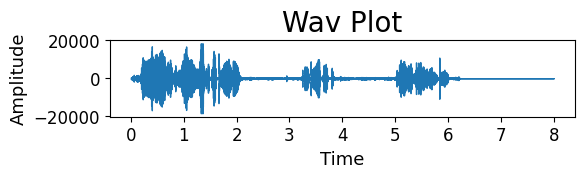

In [7]:
audioNum = 5

x = dataModel.audio[audioNum]
sr = dataModel.sampling_rates[audioNum]
plotAudio(x, sr, "Wav Plot")

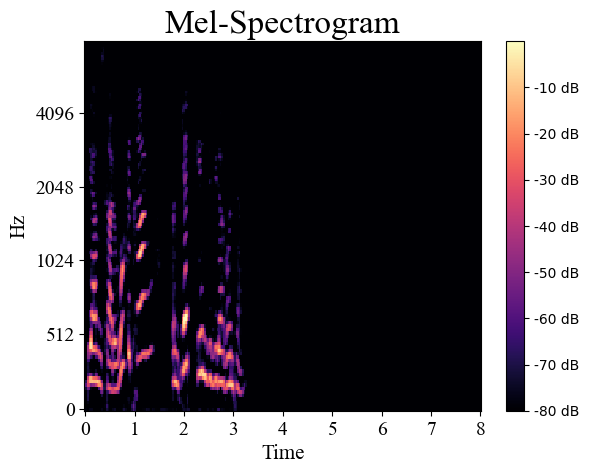

In [21]:
audioNum = 5

mel = dataModel.x_test[audioNum]
mel = mel.reshape((mel.shape[0], mel.shape[1]))
sr = dataModel.sampling_rates[audioNum]
visualizeMelSpec(mel, sr, "Mel-Spectrogram")

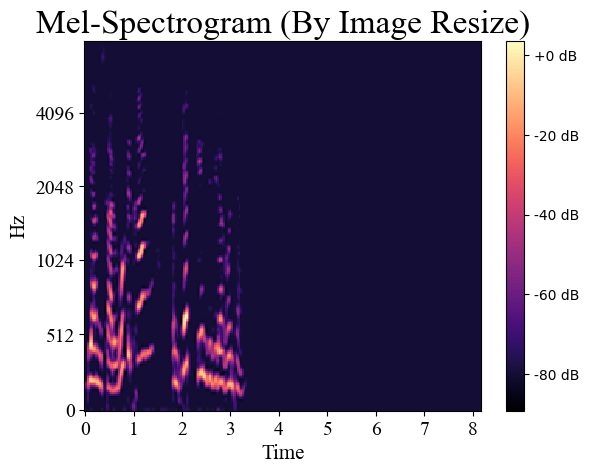

In [18]:
audioNum = 5

mel = dataModel.x_test[audioNum]
mel = mel.reshape((mel.shape[0], mel.shape[1]))
sr = dataModel.sampling_rates[audioNum]
visualizeMelSpec(mel, sr, "Mel-Spectrogram (By Image Resize)")

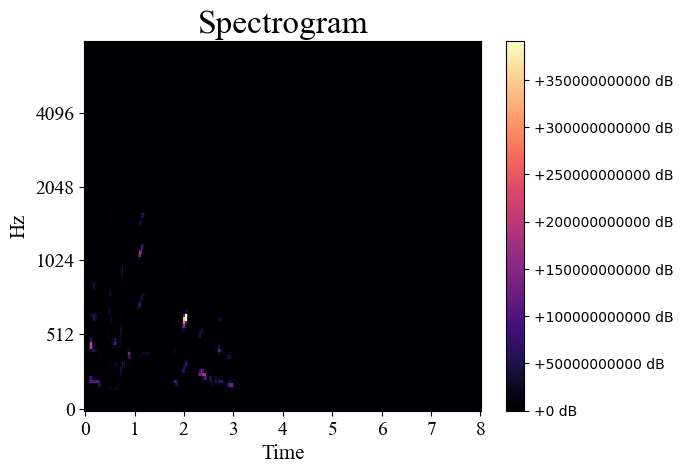

In [4]:
audioNum = 5

mel = dataModel.x_test[audioNum]
mel = mel.reshape((mel.shape[0], mel.shape[1]))
sr = dataModel.sampling_rates[audioNum]
visualizeMelSpec(mel, sr, "Spectrogram")

## Reduce Overfitting

In [5]:
def showAccuracyAndLoss(logDir, trainName, validName):
  logDir = os.path.join("IEMOCAP_ModelLog", logDir)
  
  event_training = os.path.join(logDir, 'train', trainName)
  event_validation = os.path.join(logDir, 'validation', validName)

  training_accuracy = []
  training_loss = []
  validation_accuracy = []
  validation_loss = []
  epoch = []

  serialized_examples = tf.data.TFRecordDataset(event_training)
  for serialized_example in serialized_examples:
      event = event_pb2.Event.FromString(serialized_example.numpy())
      for value in event.summary.value:
          t = tf.make_ndarray(value.tensor)
          if (value.tag == 'epoch_accuracy'):
            training_accuracy.append(np.float32(t))
            epoch.append(event.step)
          elif (value.tag == 'epoch_loss'):
            training_loss.append(np.float32(t))



  serialized_examples = tf.data.TFRecordDataset(event_validation)
  for serialized_example in serialized_examples:
      event = event_pb2.Event.FromString(serialized_example.numpy())
      for value in event.summary.value:
          t = tf.make_ndarray(value.tensor)
          if (value.tag == 'epoch_accuracy'):
            validation_accuracy.append(np.float32(t))
          elif (value.tag == 'epoch_loss'):
            validation_loss.append(np.float32(t))
            
  return epoch, training_accuracy, validation_accuracy, training_loss, validation_loss

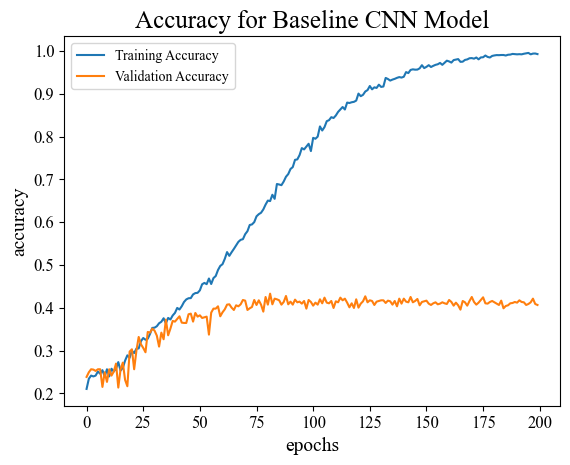

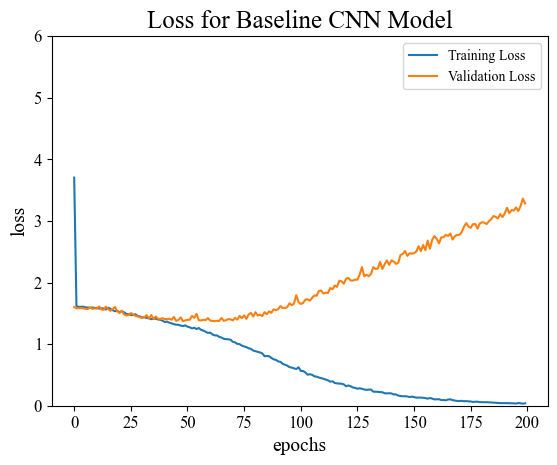

In [12]:
start = 0
accuracyTitle = "Accuracy for Baseline CNN Model"

lossTitle = "Loss for Baseline CNN Model"
titleFontSize = 18
plotList = []

labelName = "Baseline"
logDir = "12-19 17h14m48s (Experiment 2) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)"
trainName = "events.out.tfevents.1671441292.gpu-comp-102.4138.0.v2"
validName = "events.out.tfevents.1671441299.gpu-comp-102.4138.1.v2"
plotItem = showAccuracyAndLoss(logDir, trainName, validName)
plotItem = plotItem + (labelName,)
plotList.append(plotItem)

# labelName = "Removed Layers"
# logDir = "12-20 00h20m56s (Experiment 3) CNN Model B (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge) (00001 lr 0001 decay)"
# trainName = "events.out.tfevents.1671466862.gpu-comp-101.24774.0.v2"
# validName = "events.out.tfevents.1671466871.gpu-comp-101.24774.1.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)

# labelName = "More Dropout"
# logDir = "12-19 18h38m20s (Experiment 4) CNN Model C (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)"
# trainName = "events.out.tfevents.1671446303.gpu-comp-102.4138.4.v2"
# validName = "events.out.tfevents.1671446320.gpu-comp-102.4138.5.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)

# labelName = "L1 Reg"
# logDir = "01-11 17h12m11s (Experiment 20) CNN Model A STFT Reg L1 (200 Epochs) (IEMOCAP EmoDB) (No Data Aug) (5 Emotions with Merge and Split 4 Ignore 2 STFT) (00005 lr 0005 decay Stop 10)"
# trainName = "events.out.tfevents.1673428333.gpu-comp-201.15282.0.v2"
# validName = "events.out.tfevents.1673428342.gpu-comp-201.15282.1.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)

# labelName = "L2 Reg"
# logDir = "01-15 23h40m58s (Experiment 21) CNN Model A STFT Reg L2 (200 Epochs) (IEMOCAP EmoDB) (No Data Aug) (5 Emotions with Merge and Split 4 Ignore 2 STFT) (00005 lr 0005 decay Stop 10)"
# trainName = "events.out.tfevents.1673797260.gpu-comp-201.15988.0.v2"
# validName = "events.out.tfevents.1673797269.gpu-comp-201.15988.1.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)

# labelName = "Augment 2x"
# logDir = "12-24 21h00m19s (Experiment 12) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 2A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)"
# trainName = "events.out.tfevents.1671886828.gpu-comp-201.27876.0.v2"
# validName = "events.out.tfevents.1671886841.gpu-comp-201.27876.1.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)

# labelName = "Augment 3x"
# logDir = "12-24 22h45m59s (Experiment 13) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 3A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)"
# trainName = "events.out.tfevents.1671893172.gpu-comp-201.31906.0.v2"
# validName = "events.out.tfevents.1671893189.gpu-comp-201.31906.1.v2"
# plotItem = showAccuracyAndLoss(logDir, trainName, validName)
# plotItem = plotItem + (labelName,)
# plotList.append(plotItem)
 
font = {'fontname':'Times New Roman'} 

for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  plt.plot(epoch[start:], training_accuracy[start:], label=labelName+" Train")
  plt.plot(epoch[start:], validation_accuracy[start:], label=labelName+" Valid")

plt.title(accuracyTitle, fontsize=titleFontSize, **font)
plt.xlabel('epochs', fontsize=14, **font)
plt.ylabel('accuracy', fontsize=14, **font)
plt.xticks(rotation=0, fontsize=12, **font)
plt.yticks(rotation=0, fontsize=12, **font)
plt.legend(loc="upper left", prop={'family': font['fontname']})
# plt.show()
plt.savefig("figure.png", transparent=True, bbox_inches='tight')
plt.show()

for epoch, training_accuracy, validation_accuracy, training_loss, validation_loss, labelName in plotList:
  plt.plot(epoch[start:], training_loss[start:], label=labelName+" Train")
  plt.plot(epoch[start:], validation_loss[start:], label=labelName+" Valid")

plt.title(lossTitle, fontsize=titleFontSize, **font)
plt.xlabel('epochs', fontsize=14, **font)
plt.ylabel('loss', fontsize=14, **font)
plt.xticks(rotation=0, fontsize=12, **font)
plt.yticks(rotation=0, fontsize=12, **font)
ax = plt.gca()
ax.set_ylim([0, 6])
plt.legend(prop={'family': font['fontname']})
# plt.savefig("figure.png", transparent=True, bbox_inches='tight')
plt.show()

## Data distribution

In [12]:
data_path = 'Data/EmoDB'

In [13]:
file_paths = []

for dirname, _, filenames in os.walk(data_path):
  for filename in filenames:  
    file_path = os.path.join(dirname, filename)
    file_paths.append(file_path)

In [20]:
labels_dict = {'W': 'anger', 'L': 'boredom', 'E': 'disgust', 'A': 'frustration', 'F': 'happiness', 'T': 'sadness', 'N': 'neutral'}
labels_name = ['anger', 'boredom', 'disgust', 'frustration', 'happiness', 'sadness', 'neutral']
labels = []

for file_path in file_paths:
  filename = os.path.basename(file_path)
  label_code = filename[5]
  if (label_code in labels_dict):
    labels.append(labels_dict[label_code])

emotion_df = pd.DataFrame(data=labels, columns=['Emotion'])

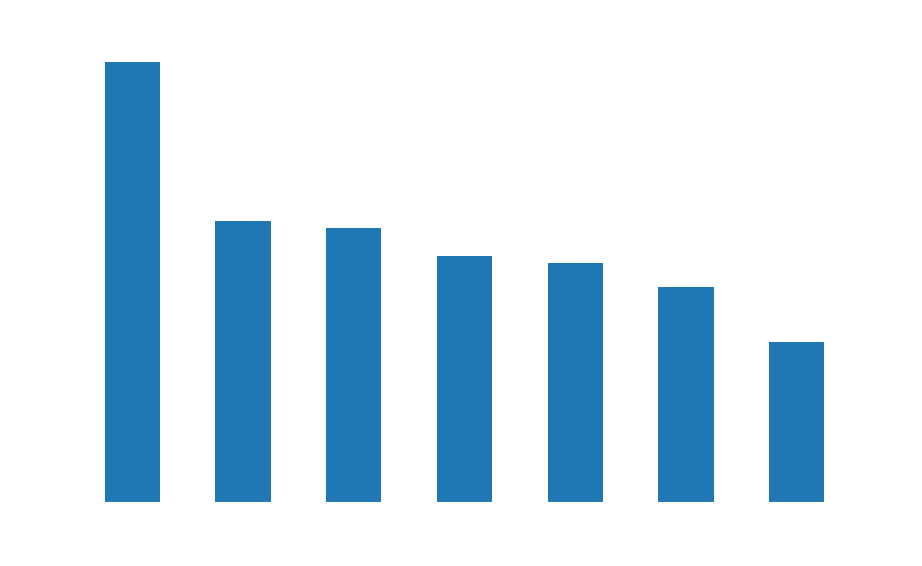

In [22]:
graph = emotion_df['Emotion'].value_counts()[:]
graph.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.title('Berlin Database of Emotional Speech (EmoDB) Data Distribution', fontsize=20, color='w')
plt.savefig("figure.png", transparent=True, bbox_inches='tight')
